In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

/tmp/ipykernel_28624/2902150714.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


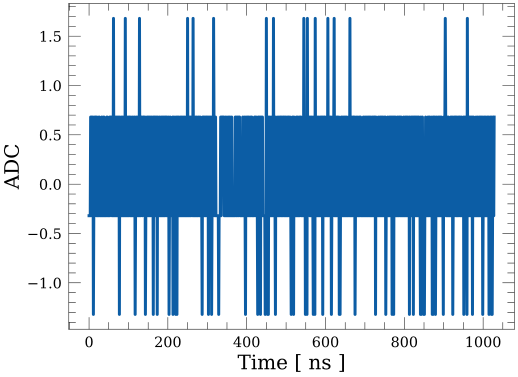

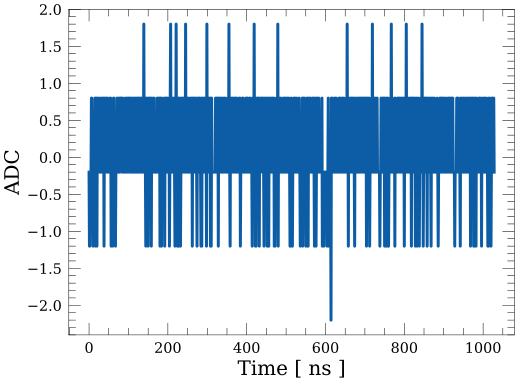

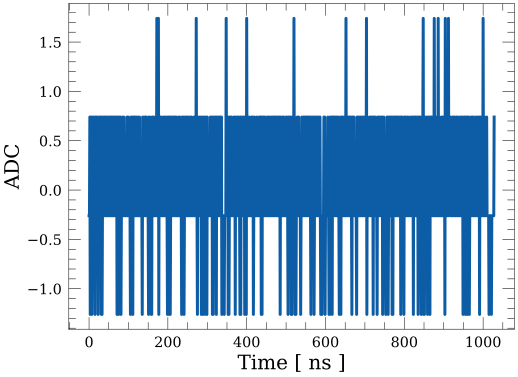

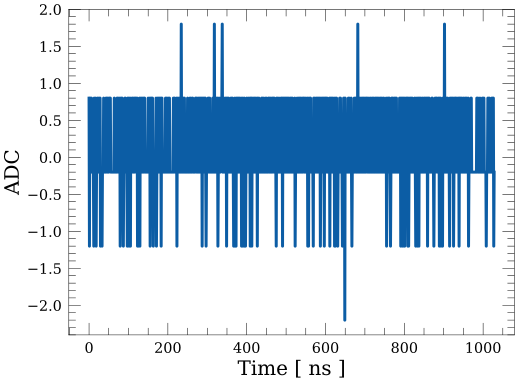

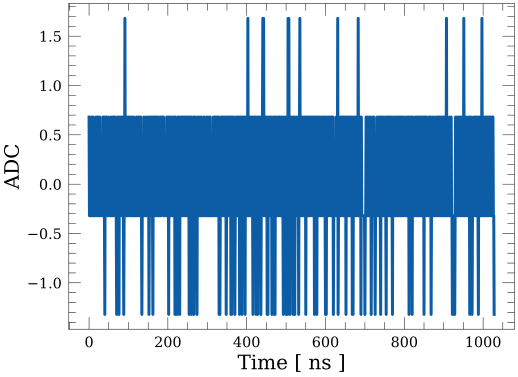

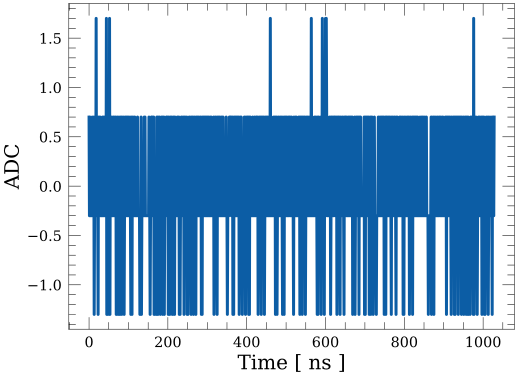

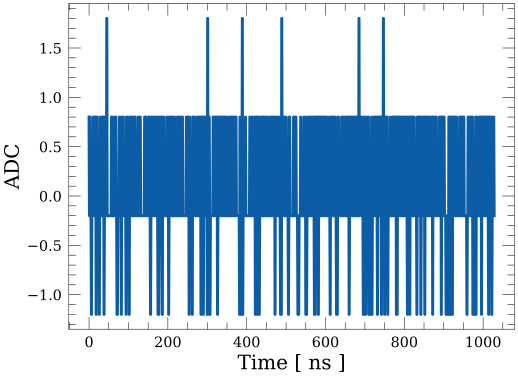

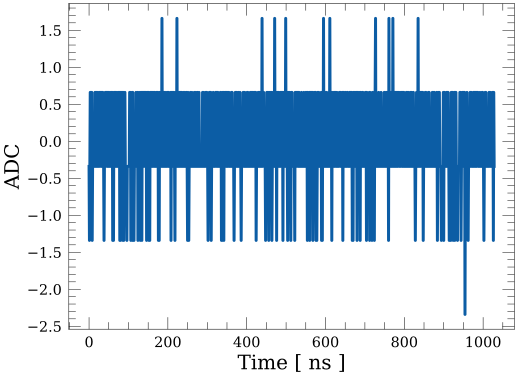

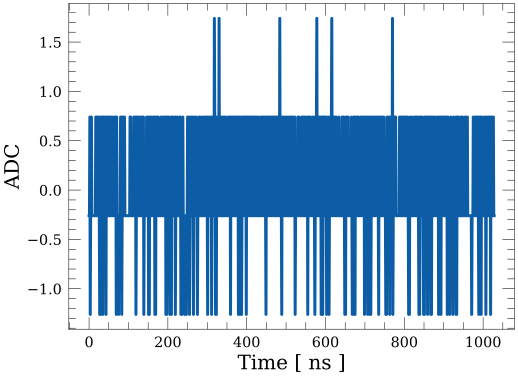

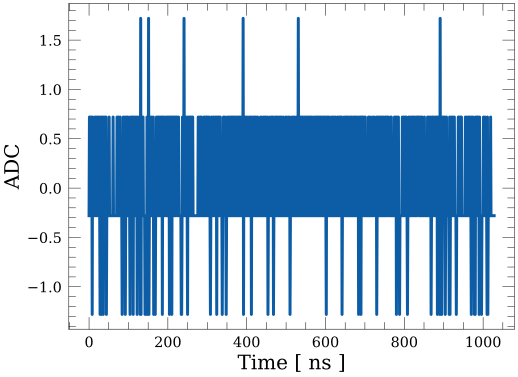

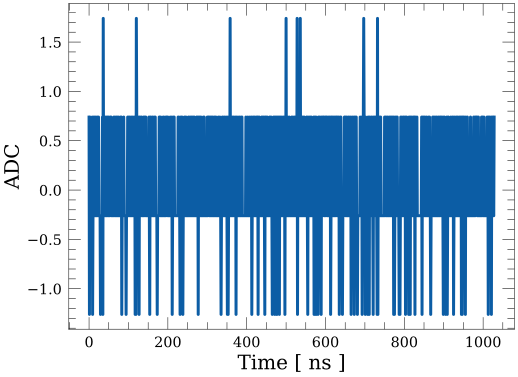

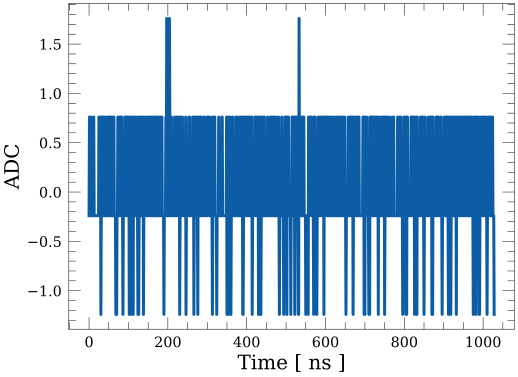

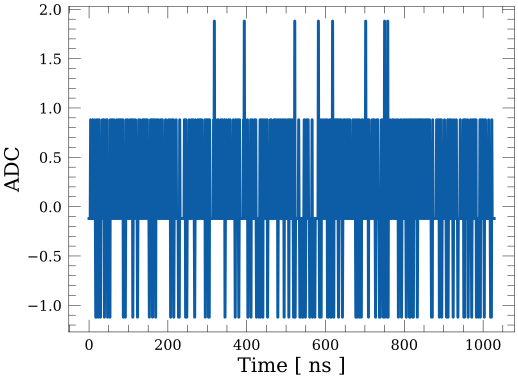

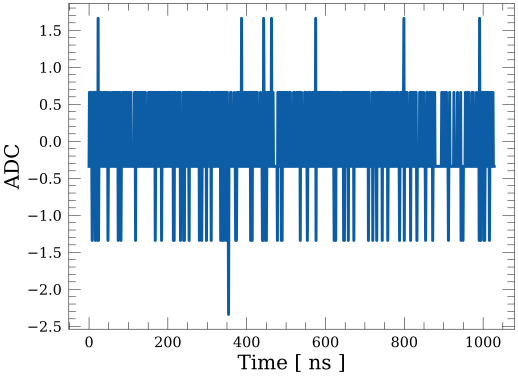

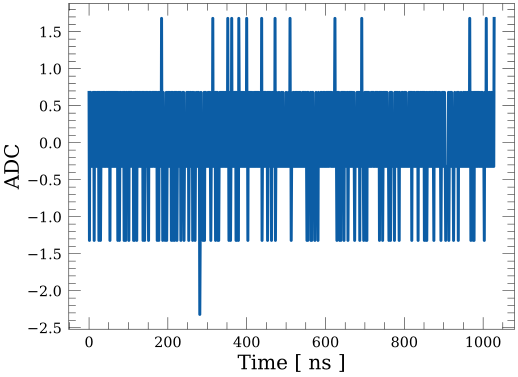

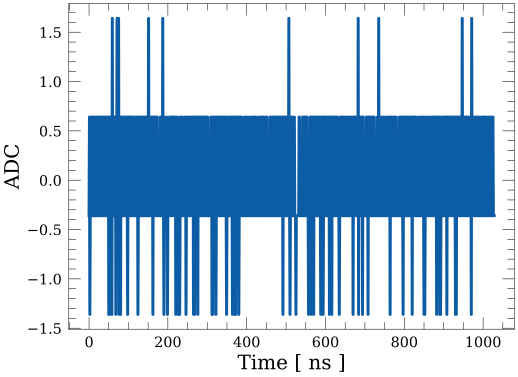

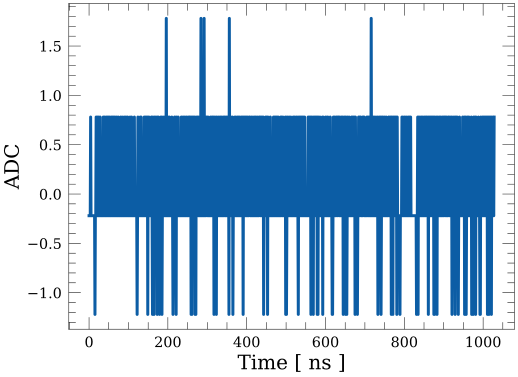

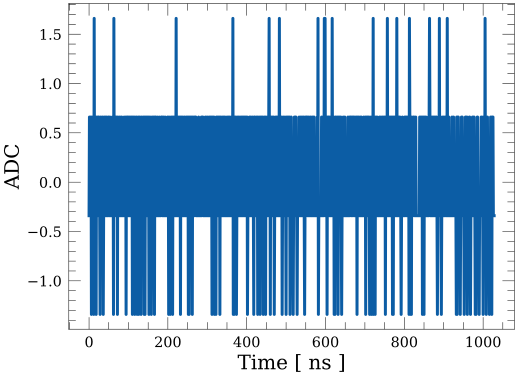

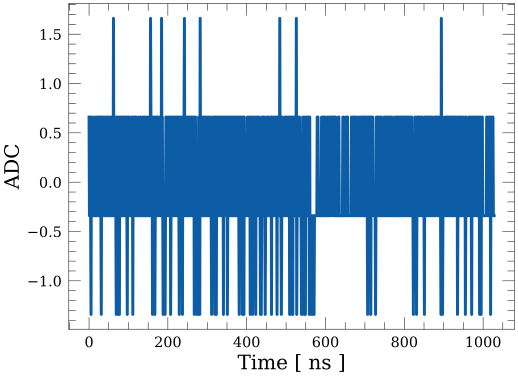

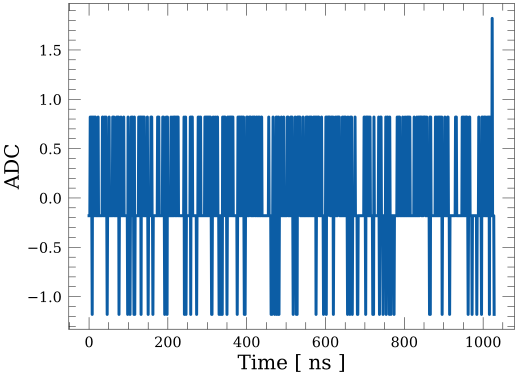

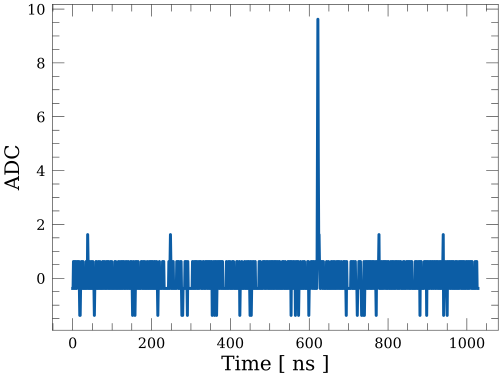

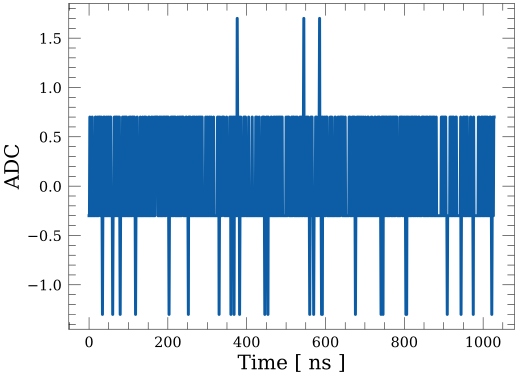

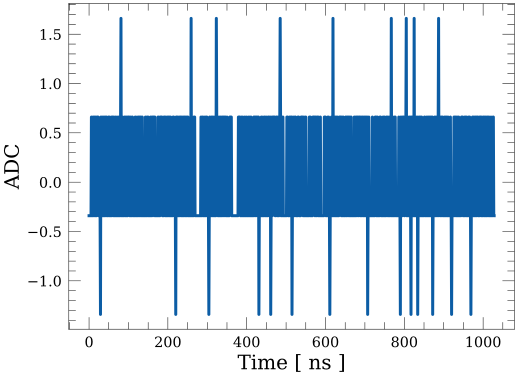

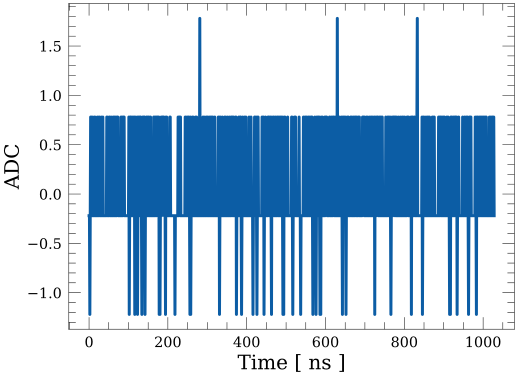

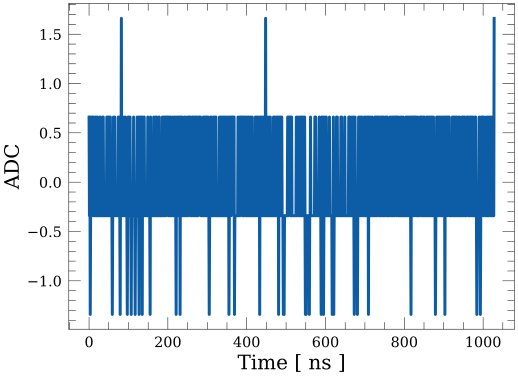

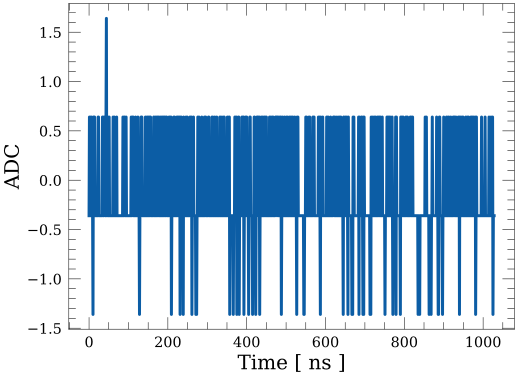

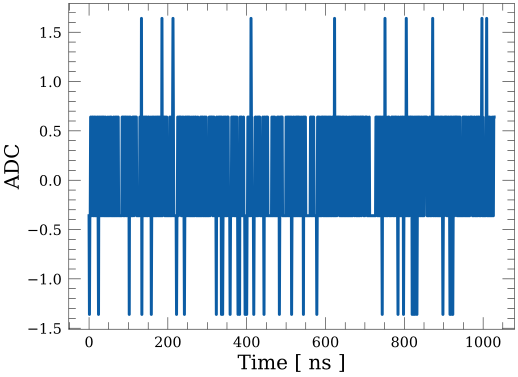

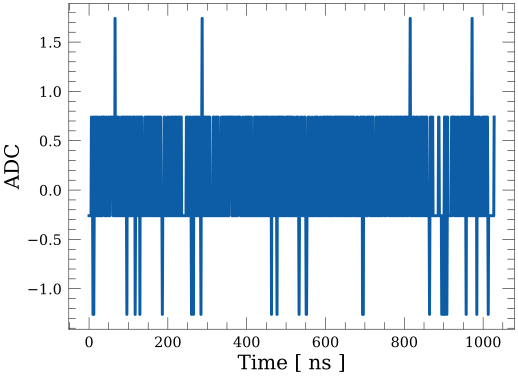

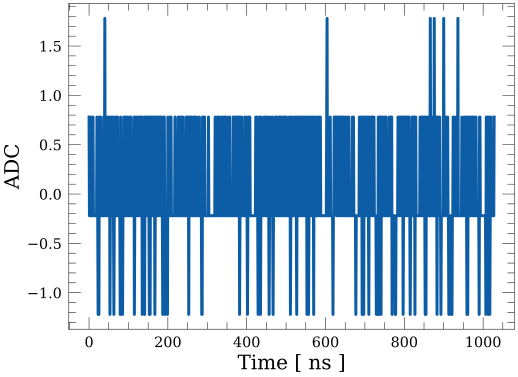

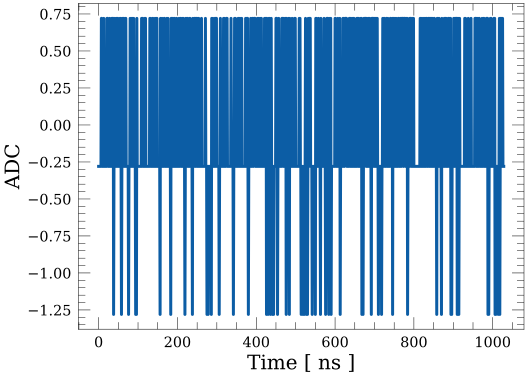

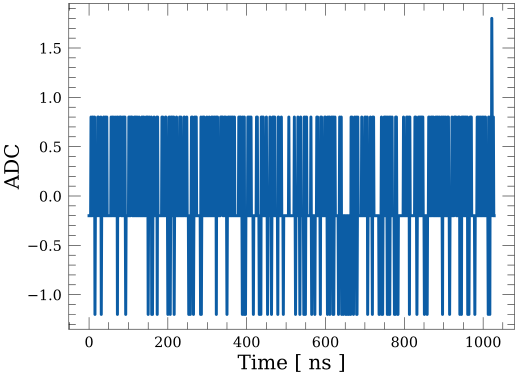

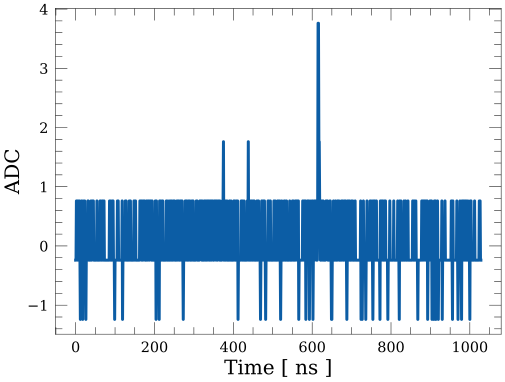

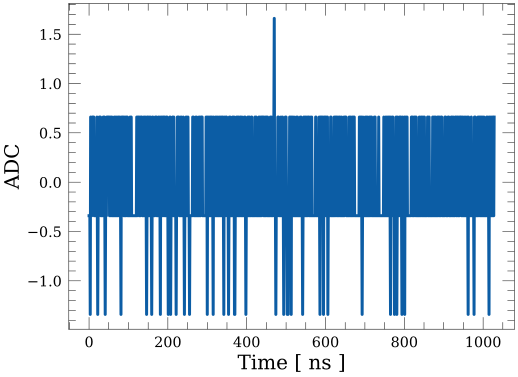

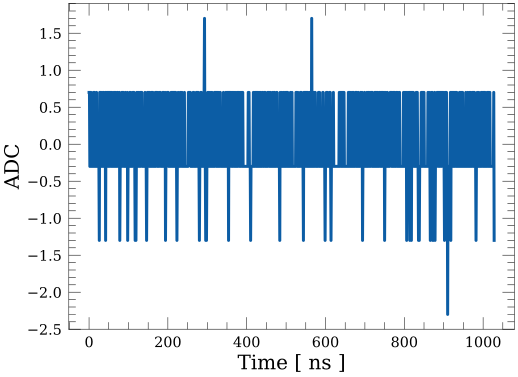

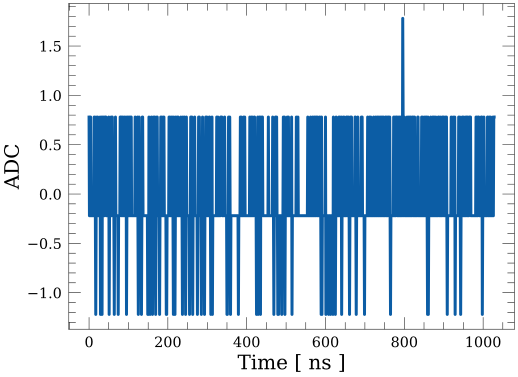

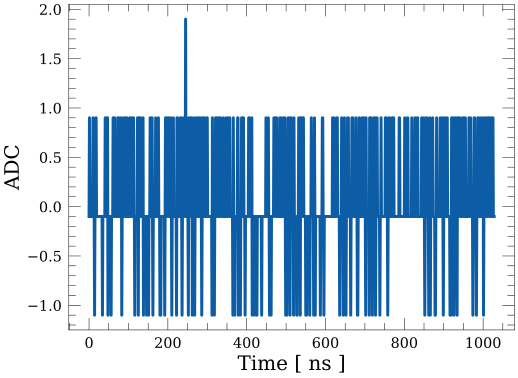

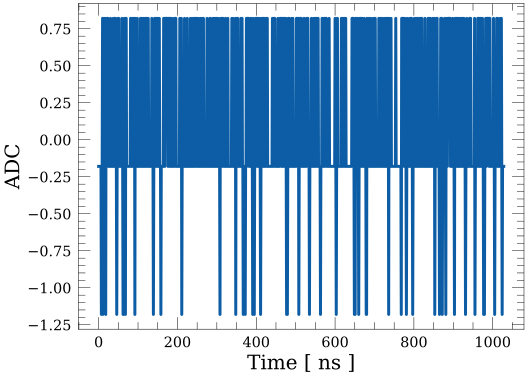

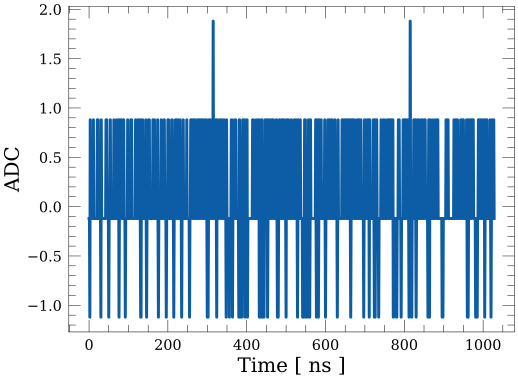

In [14]:
from importlib import reload
import DataReader
reload(DataReader)
from DataReader import WaveDumpReader,Workflow_WaveformRec
from copy import copy
# dir_path = {"w/ LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave0.dat",
#             "w/o LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_10min/wave0.dat",
#             "w/ LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave1.dat",
#             "w/o LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/DarkNoise_10min/wave1.dat",
#             }
dir_path = {"w/ LED(ch0)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave0.dat",
            "w/ LED(ch1)":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/LED_100ns_2_2V/wave1.dat"
            }
dir_simple_charge = {"w/ LED(ch0)":[],"w/ LED(ch1)":[]}
dir_df_data = {}
for key,path in dir_path.items():
    df_data = WaveDumpReader(path,nEvts=20)
    # df_data = df_data[1000:].reset_index()
    for wave in df_data["waveform"]:
        baseline = np.mean(wave[:50])
        dir_simple_charge[key].append( -np.sum(wave[500:700]-baseline) )
        if dir_simple_charge[key][-1] <20:
            plt.figure()
            plt.plot((np.array(wave)-baseline)*-1)
            plt.xlabel("Time [ ns ]")
            plt.ylabel("ADC")
    del df_data

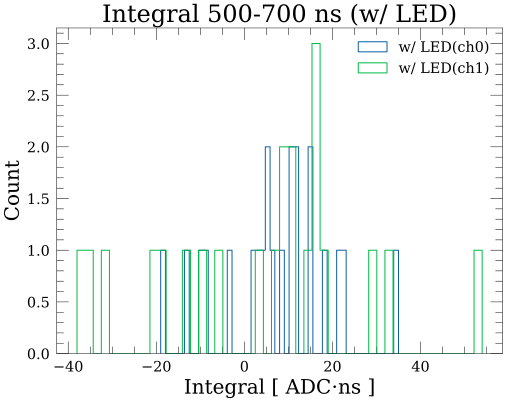

In [3]:

for key,v_charge in dir_simple_charge.items():
    plt.hist(v_charge, bins=50,histtype="step",label=key)
    plt.xlabel("Integral [ ADC$\cdot$ns ]")
    plt.ylabel("Count")
    plt.title("Integral 500-700 ns (w/ LED)")
plt.legend()